**Задание 1**

1) Используя средства модуля [pandas](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/pandas.ipynb), определите среднюю, максималную, минимальную зарплату и среднюю, максималную, минимальную пенсию в Санкт-Петербурге в 2018 году.

2) Продемонстрируйте умение построения графиков (для произвольных значений) с помощью plot.


**Задание 2**

Для [файла](http://dfedorov.spb.ru/python3/forecast.html), расположенного в сети Интернет, напишите сценарий с использованием [модуля bs4](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/bs4.ipynb), который извлекает данные и сохраняет их в файле формата CSV, где первый столбец - день недели, второй столбец - погода. 

**Переходим к решению первой задачи:**

Импортируем модуль pandas:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Читаем содержимое csv файла:

In [8]:
data = pd.read_csv('opendata.csv', encoding='cp1251')
data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


Далее пошаговый код...

1.1. Используя средства модуля pandas, определите среднюю, максималную, минимальную зарплату и среднюю, максималную, минимальную пенсию в Санкт-Петербурге в 2018 году.

1) Мой (гениальный) способ, вершина мысли - через цикл:

In [9]:
frame = pd.DataFrame([i[0] for i in data['date'].str.split('-')])

In [10]:
data[data['region'] == 'Санкт-Петербург'][data['name'] == 'Средняя зарплата'][frame[0] == '2018']

D:\alyoshenka\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,region,date,value
36763,Средняя зарплата,Санкт-Петербург,2018-01-15,31599
36764,Средняя зарплата,Санкт-Петербург,2018-02-15,42401
36765,Средняя зарплата,Санкт-Петербург,2018-03-15,41373
36766,Средняя зарплата,Санкт-Петербург,2018-04-15,44363
36767,Средняя зарплата,Санкт-Петербург,2018-05-15,46424
36768,Средняя зарплата,Санкт-Петербург,2018-06-15,49700
36769,Средняя зарплата,Санкт-Петербург,2018-07-15,45798
36770,Средняя зарплата,Санкт-Петербург,2018-08-15,43612
36771,Средняя зарплата,Санкт-Петербург,2018-09-15,41412
36772,Средняя зарплата,Санкт-Петербург,2018-10-15,43450


2) Самый адекватный способ - через str.contains:

In [11]:
spb_2018_salary = data[data['region'] == 'Санкт-Петербург'][data['name'] == 'Средняя зарплата'][data['date'].str.contains('2018')]
spb_2018_salary

D:\alyoshenka\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,region,date,value
36763,Средняя зарплата,Санкт-Петербург,2018-01-15,31599
36764,Средняя зарплата,Санкт-Петербург,2018-02-15,42401
36765,Средняя зарплата,Санкт-Петербург,2018-03-15,41373
36766,Средняя зарплата,Санкт-Петербург,2018-04-15,44363
36767,Средняя зарплата,Санкт-Петербург,2018-05-15,46424
36768,Средняя зарплата,Санкт-Петербург,2018-06-15,49700
36769,Средняя зарплата,Санкт-Петербург,2018-07-15,45798
36770,Средняя зарплата,Санкт-Петербург,2018-08-15,43612
36771,Средняя зарплата,Санкт-Петербург,2018-09-15,41412
36772,Средняя зарплата,Санкт-Петербург,2018-10-15,43450


In [12]:
spb_2018_salary.mean()

value    43176.454545
dtype: float64

In [13]:
spb_2018_salary.min()

name      Средняя зарплата
region     Санкт-Петербург
date            2018-01-15
value                31599
dtype: object

In [14]:
spb_2018_salary.max()

name      Средняя зарплата
region     Санкт-Петербург
date            2018-11-15
value                49700
dtype: object

In [15]:
spb_2018_pension = data[data['region'] == 'Санкт-Петербург'][data['name'] == 'Средняя пенсия'][data['date'].str.contains('2018')]
spb_2018_pension

D:\alyoshenka\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,region,date,value
41479,Средняя пенсия,Санкт-Петербург,2018-01-15,14694
41480,Средняя пенсия,Санкт-Петербург,2018-02-15,17019
41481,Средняя пенсия,Санкт-Петербург,2018-03-15,17058
41482,Средняя пенсия,Санкт-Петербург,2018-04-15,19922
41483,Средняя пенсия,Санкт-Петербург,2018-05-15,15276
41484,Средняя пенсия,Санкт-Петербург,2018-06-15,18958
41485,Средняя пенсия,Санкт-Петербург,2018-07-15,15045
41486,Средняя пенсия,Санкт-Петербург,2018-08-15,19636
41487,Средняя пенсия,Санкт-Петербург,2018-09-15,15106
41488,Средняя пенсия,Санкт-Петербург,2018-10-15,17644


In [16]:
spb_2018_pension.mean()

value    17023.454545
dtype: float64

In [17]:
spb_2018_pension.min()

name       Средняя пенсия
region    Санкт-Петербург
date           2018-01-15
value               14694
dtype: object

In [18]:
spb_2018_pension.max()

name       Средняя пенсия
region    Санкт-Петербург
date           2018-11-15
value               19922
dtype: object

3) Самый тупой способ - через срез:

In [19]:
data[36763:36774][data['region'] == 'Санкт-Петербург'][data['name'] == 'Средняя зарплата']

D:\alyoshenka\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,region,date,value
36763,Средняя зарплата,Санкт-Петербург,2018-01-15,31599
36764,Средняя зарплата,Санкт-Петербург,2018-02-15,42401
36765,Средняя зарплата,Санкт-Петербург,2018-03-15,41373
36766,Средняя зарплата,Санкт-Петербург,2018-04-15,44363
36767,Средняя зарплата,Санкт-Петербург,2018-05-15,46424
36768,Средняя зарплата,Санкт-Петербург,2018-06-15,49700
36769,Средняя зарплата,Санкт-Петербург,2018-07-15,45798
36770,Средняя зарплата,Санкт-Петербург,2018-08-15,43612
36771,Средняя зарплата,Санкт-Петербург,2018-09-15,41412
36772,Средняя зарплата,Санкт-Петербург,2018-10-15,43450


1.2. Продемонстрируйте умение построения графиков (для произвольных значений) с помощью plot.

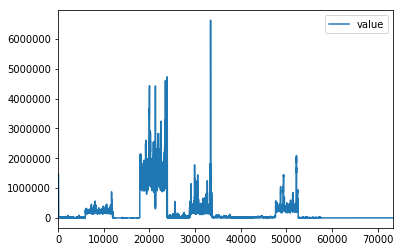

In [20]:
data.plot()

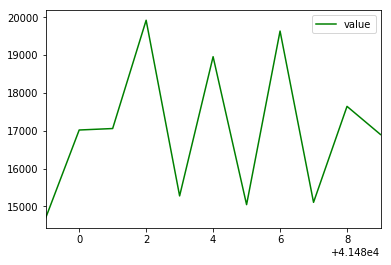

In [22]:
spb_2018_pension.plot(color = 'green')

**Переходим к решению второй задачи:**

2.1. Для файла, расположенного в сети Интернет, напишите сценарий с использованием модуля bs4, который извлекает данные и сохраняет их в файле формата CSV, где первый столбец - день недели, второй столбец - погода.

In [24]:
import bs4

In [25]:
def read_url(url):
    """ Читает содержимое сайта """
    import urllib.request    
    with urllib.request.urlopen(url) as webpage:
        text = webpage.read().decode('utf-8')
    return text

In [27]:
text = read_url("http://dfedorov.spb.ru/python3/forecast.html")
print(text)

<html>
  <body>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Сегодня ночью</b></div>
        <div class="forecast-text">Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Пятница</b></div>
        <div class="forecast-text">Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Ночь пятницы</b></div>
        <div class="forecast-text">Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Суббота</b></div>
        <div class="f

In [28]:
bs = bs4.BeautifulSoup(text, 'html.parser')

In [34]:
label_list = bs.select('.forecast-label')
label_list

[<div class="forecast-label"><b>Сегодня ночью</b></div>,
 <div class="forecast-label"><b>Пятница</b></div>,
 <div class="forecast-label"><b>Ночь пятницы</b></div>,
 <div class="forecast-label"><b>Суббота</b></div>,
 <div class="forecast-label"><b>Субботняя ночь</b></div>,
 <div class="forecast-label"><b>Воскресенье</b></div>,
 <div class="forecast-label"><b>Воскресный вечер</b></div>,
 <div class="forecast-label"><b>Понедельник</b></div>,
 <div class="forecast-label"><b>Ночь понедельника</b></div>,
 <div class="forecast-label"><b>Вторник</b></div>,
 <div class="forecast-label"><b>Вечер вторника</b></div>,
 <div class="forecast-label"><b>Среда</b></div>,
 <div class="forecast-label"><b>Ночь среды</b></div>,
 <div class="forecast-label"><b>Четверг</b></div>]

In [35]:
lst = []
for i in range(0, len(label_list)):
    lst.append(label_list[i].text)
lst

['Сегодня ночью',
 'Пятница',
 'Ночь пятницы',
 'Суббота',
 'Субботняя ночь',
 'Воскресенье',
 'Воскресный вечер',
 'Понедельник',
 'Ночь понедельника',
 'Вторник',
 'Вечер вторника',
 'Среда',
 'Ночь среды',
 'Четверг']

In [37]:
text_list = bs.select('.forecast-text')
text_list

[<div class="forecast-text">Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.</div>,
 <div class="forecast-text">Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.</div>,
 <div class="forecast-text">Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.</div>,
 <div class="forecast-text">В основном солнечно, с высокой температурой около 73. Северный ветер около 10 миль в час.</div>,
 <div class="forecast-text">Облачно с прояснениями, около 63. Ветер северный, 5-10 миль в час.</div>,
 <div class="forecast-text">В основном солнечно, с высотой около 73.</div>,
 <div class="forecast-text">Облачно с прояснениями около 64.</div>,
 <div class="forecast-text">Преимущественно солнечно, с высоким около 74.</div>,
 <div class="fo

In [38]:
lst2 = []
for i in range(0, len(text_list)):
    lst2.append(text_list[i].text)
lst2

['Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.',
 'Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.',
 'Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.',
 'В основном солнечно, с высокой температурой около 73. Северный ветер около 10 миль в час.',
 'Облачно с прояснениями, около 63. Ветер северный, 5-10 миль в час.',
 'В основном солнечно, с высотой около 73.',
 'Облачно с прояснениями около 64.',
 'Преимущественно солнечно, с высоким около 74.',
 'В основном ясно, с низким около 65.',
 'Солнечный, с высоким около 75.',
 'В основном ясно, с низким около 65.',
 'Солнечный, с высоким около 77.',
 'В основном ясно, с низким около 67.',
 'Вероятность дождя после 1 вечера. Преимущественно солнечно, с максимумо

In [41]:
weather_forecast = list(zip(lst, lst2))
weather_forecast

[('Сегодня ночью',
  'Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.'),
 ('Пятница',
  'Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.'),
 ('Ночь пятницы',
  'Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.'),
 ('Суббота',
  'В основном солнечно, с высокой температурой около 73. Северный ветер около 10 миль в час.'),
 ('Субботняя ночь',
  'Облачно с прояснениями, около 63. Ветер северный, 5-10 миль в час.'),
 ('Воскресенье', 'В основном солнечно, с высотой около 73.'),
 ('Воскресный вечер', 'Облачно с прояснениями около 64.'),
 ('Понедельник', 'Преимущественно солнечно, с высоким около 74.'),
 ('Ночь понедельника', 'В основном ясно, с низким около 65.'),
 ('Вторник', 'Солнечный, с высоким около 75.'),
 ('

In [40]:
with open('weather.csv', mode='w') as file:
    file = csv.writer(file, lineterminator="\n")
    for line in weather:
        file.writerow(line)